# Домашнее задание № 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

# Data Overview
Ознакомить с данными можно в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv)

Если вкратце, то у вас есть 30 параметров и одна целевая переменная G3

Данные случайным образом разделены на train и test, для train у вас есть ответы, а для test - нет. Необходимо построить такой алгоритм, который будет хорошо предсказывать на test-овых данных.

In [2]:
train = pd.read_csv('./data/train_features_with_answers.csv')
X_test = pd.read_csv('./data/X_test.csv')
train.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13


In [3]:
X_test.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,yes,yes,no,3,2,4,1,4,2,4
1,GP,F,16,U,GT3,A,3,1,services,other,...,yes,yes,no,2,3,3,2,2,4,2
2,MS,F,18,U,GT3,T,4,4,teacher,teacher,...,yes,yes,no,4,3,5,1,2,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
school        454 non-null object
sex           454 non-null object
age           426 non-null float64
address       449 non-null object
famsize       454 non-null object
Pstatus       454 non-null object
Medu          454 non-null int64
Fedu          454 non-null int64
Mjob          454 non-null object
Fjob          454 non-null object
reason        454 non-null object
guardian      454 non-null object
traveltime    454 non-null int64
studytime     454 non-null int64
failures      454 non-null int64
schoolsup     454 non-null object
famsup        454 non-null object
paid          454 non-null object
activities    454 non-null object
nursery       454 non-null object
higher        454 non-null object
internet      454 non-null object
romantic      454 non-null object
famrel        454 non-null int64
freetime      454 non-null int64
goout         454 non-null int64
Dalc          454 

# Визуальный анализ данных (Exploratory Data Analysis) [25 %]

## Sex, age and address (incomplete data)

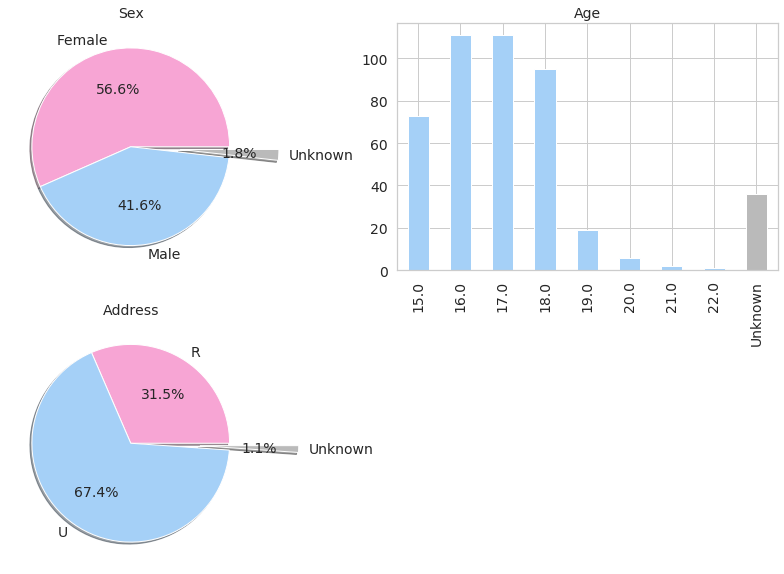

In [5]:
bincmap = ["#F7A5D4","#A5D0F7","#BABABA"]

plt.subplots(figsize=(15,10))

plt.subplot(221)
train['sex'] = train['sex'].apply(lambda x: "Unknown" if (x != "F" and x != "M") else x) 
pst = train.groupby('sex').size()
pst.plot(kind='pie', subplots=True, colors=bincmap, explode=(0, 0, 0.5), \
         autopct='%1.1f%%', fontsize=14, shadow=True, labels=('Female', 'Male', 'Unknown'))
plt.title("Sex", fontsize=14)
plt.ylabel("")
train['sex'] = train['sex'].apply(lambda x: None if (x == "Unknown") else x) 

plt.subplot(222)
train['age'] = train['age'].apply(lambda x: "Unknown" if (x == "Unknown" or np.isnan(x)\
                                            or float(x) < 15 or float(x) > 23) else x) 
pst = train.groupby('age').size()
pst.plot(kind='bar', fontsize=14, color=[bincmap[1]]*8 + [bincmap[2]])
plt.title("Age", fontsize=14)
plt.ylabel("")
plt.xlabel("")
train['age'] = train['age'].apply(lambda x: None if (x == "Unknown") else x) 


plt.subplot(223)
train['address'] = train['address'].apply(lambda x: "Unknown" if (type(x) != str) else x)
pst = train.groupby('address').size()
pst.plot(kind='pie', subplots=True, colors=bincmap, explode=(0, 0, 0.7),\
         autopct='%1.1f%%', fontsize=14, shadow=True)
plt.title("Address", fontsize=14)
plt.ylabel("")
train['address'] = train['address'].apply(lambda x: None if (x == "Unknown") else x) 

plt.show()

## Alcohol consumption, romantic life and studying time

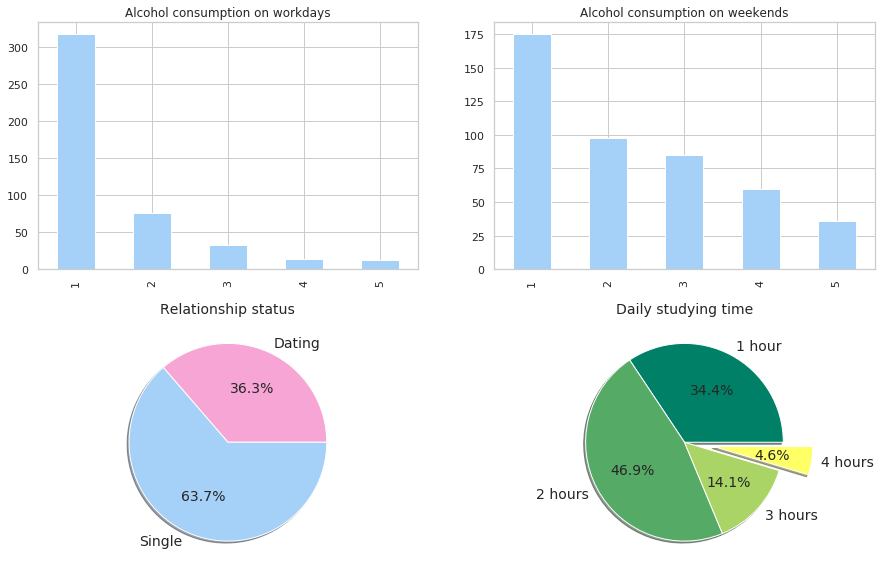

In [6]:
plt.subplots(figsize=(15,10))

pst = train.groupby('Dalc').size()
plt.subplot(221)
pst.plot(kind='bar', subplots=True, color=bincmap[1])
plt.title("Alcohol consumption on workdays")
plt.xlabel("")
plt.ylabel("")

pst = train.groupby('Walc').size()
plt.subplot(222)
pst.plot(kind='bar', subplots=True, color=bincmap[1])
plt.title("Alcohol consumption on weekends")
plt.xlabel("")
plt.ylabel("")

plt.subplot(223)
pst = train.groupby('romantic').size()
pst[::-1].plot(kind='pie', subplots=True, colors=bincmap, \
              autopct='%1.1f%%', shadow=True, fontsize=14, labels=['Dating', 'Single'])
plt.title("Relationship status", fontsize=14)
plt.ylabel("")

plt.subplot(224)
pst = train.groupby('studytime').size()
pst.plot(kind='pie', subplots=True, cmap='summer', explode=(0, 0, 0, 0.3), \
         autopct='%1.1f%%', shadow=True, fontsize=14, labels=['1 hour', '2 hours', '3 hours', '4 hours'])
plt.title("Daily studying time", fontsize=14)
plt.ylabel("")
plt.xlabel("")

plt.show()

### Other features

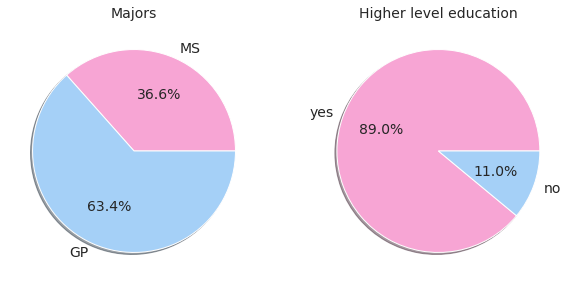

In [7]:
plt.subplots(figsize=(10,6))

plt.subplot(121)
pst = train.groupby('school').size()
pst[::-1].plot(kind='pie', subplots=True, colors=bincmap,  \
         autopct='%1.1f%%', shadow=True, fontsize=14)
plt.title("Majors", fontsize=14)
plt.ylabel("")
plt.xlabel("")

plt.subplot(122)
pst = train.groupby('higher').size()
pst[::-1].plot(kind='pie', subplots=True, colors=bincmap,  \
         autopct='%1.1f%%', shadow=True, fontsize=14)
plt.title("Higher level education", fontsize=14)
plt.ylabel("")
plt.xlabel("")

plt.show()

### Final grade

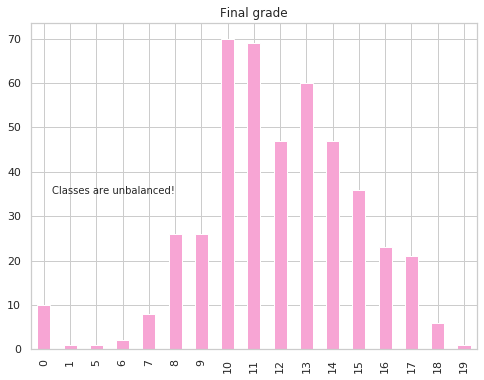

In [8]:
plt.subplots(figsize=(8,6))

pst = train.groupby('G3').size()
pst.plot(kind='bar', subplots=True, color=bincmap[0])
plt.title("Final grade")
plt.text(0.3, 35, 'Classes are unbalanced!')
plt.xlabel("")
plt.ylabel("")
plt.show()

## Постройте матрицу корреляции между признаками

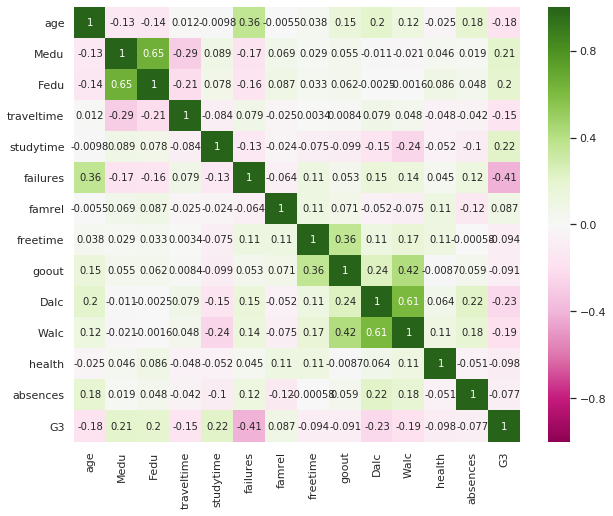

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), 
         vmin=-1, vmax=1,annot=True, cmap='PiYG',)
plt.show()

## Посчитайте число уникальных значений для каждого признака

In [10]:
print(train.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      22
G3            17
dtype: int64


# Предобработка данных [25%]

## Сделайте признаки категориальными (ну без этого просто не заработает)

In [11]:
def enc(train):
    ohe_train = train
    for col_name in train.columns:
        if train[col_name].dtype != object:
            continue
        ohe_train = pd.concat([ohe_train, pd.get_dummies(train[col_name], prefix=col_name)\
                              ], axis=1).drop([col_name], axis=1)
    
    return ohe_train

def bin_enc(train):
    ohe_train = train
    for col_name in train.columns:
        if train[col_name].dtype != object:
            continue
        if train.nunique()[col_name] == 2:
            ohe_train = pd.concat([ohe_train.drop([col_name], axis=1), pd.get_dummies(train[col_name], prefix=col_name)\
                                   .drop(pd.get_dummies(train[col_name], prefix=col_name).columns[0], axis=1)], axis=1)
            continue
        ohe_train = pd.concat([ohe_train, pd.get_dummies(train[col_name], prefix=col_name)\
                              ], axis=1).drop([col_name], axis=1)
    
    return ohe_train

Теперь перейдем непосредственно к подготовке данных для работы. Не все из описанного ниже нужно делать. Подумайте.

## Заполните пропуски в данных

### Ошибки заменены на этапе визуализации

Напоминание!
Это можно сделать следующими способами:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту [+10% за дз]

In [12]:
from sklearn.tree import DecisionTreeRegressor

#tree regression for age
o_train = enc(train.drop(['age'], axis=1))
full_train = train.copy()

X_train = o_train.drop(train[np.isnan(train['age'])].index)
y_train = train.drop(train[np.isnan(train['age'])].index)['age']

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

for index, row in train.iterrows():
    if np.isnan(row['age']):
        full_train.loc[index, 'age'] = tree_reg.predict(o_train.loc[index].values.reshape(1,-1))

train = full_train.copy()

#for sex and address as well
o_train = enc(train.drop(['sex'], axis=1))

X_train = o_train.drop(train[train['sex'] == None].index)
y_train = enc((train.drop(train[train['sex'] == None].index)['sex']).to_frame())['sex_M']

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

for index, row in train.iterrows():
    if row['sex'] == None:
        if tree_reg.predict(o_train.loc[index].values.reshape(1,-1)):
            full_train.loc[index, 'sex'] = 'M'
        else:
            full_train.loc[index, 'sex'] = 'F'

o_train = enc(train.drop(['sex'], axis=1))

X_train = o_train.drop(train[train['address'] == None].index)
y_train = enc((train.drop(train[train['address'] == None].index)['address']).to_frame())['address_U']

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

for index, row in train.iterrows():
    if row['address'] == None:
        if tree_reg.predict(o_train.loc[index].values.reshape(1,-1)):
            full_train.loc[index, 'address'] = 'U'
        else:
            full_train.loc[index, 'address'] = 'R'

train = full_train.copy()

## Придумайте сложные признаки

Сложные признаки = комбинации существующих.
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.
Не менее 2х (это для практики, в обучении можете их не использовать, но это будет означать, что вы плохо их сконструировали).

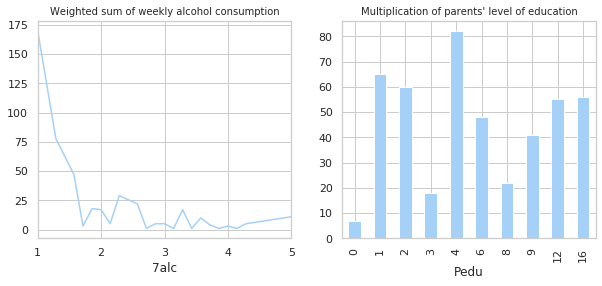

In [13]:
plt.subplots(figsize=(10,4))

#weekly alcohol consumption as a weighted sum
train['7alc'] = (train['Dalc']*5 + train['Walc']*2)/7 

plt.subplot(121)
pst = train.groupby('7alc').size()
pst.plot(kind='line', subplots=True, color=bincmap[1])
plt.title("Weighted sum of weekly alcohol consumption", fontsize=10)

#education of parents multiplied
train['Pedu'] = train['Medu'] * train['Fedu']

plt.subplot(122)
pst = train.groupby('Pedu').size()
pst.plot(kind='bar', subplots=True, color=bincmap[1])
plt.title("Multiplication of parents' level of education", fontsize=10)

plt.show()

## Попробуйте удалить скоррелированные данные

In [14]:
train.drop(['Walc'], axis=1)
train.drop(['Dalc'], axis=1)
train.drop(['Medu'], axis=1)
train.drop(['Fedu'], axis=1)
#all data remained in the set, I only combined already correlated features
train = bin_enc(train)
print()

## Сделайте баллансировку классов

Вот это из категории необязательных.
В данном случае можно сделать ее так:
- Выкинуть те, которых много.
- Дублировать примеры для случаев, которых мало (наиболее адекватный).
- Увеличить lr (вес) тех случаев, которых мало.

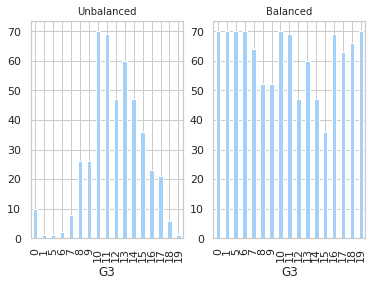

In [15]:
y = train['G3']

fig, ax = plt.subplots()
counts = np.unique(y, return_counts=True)
pd.DataFrame(counts[1], counts[0], columns=['counts'])

plt.subplot(121)
pst = train.groupby('G3').size()
pst.plot(kind='bar', subplots=True, color=bincmap[1])
plt.title("Unbalanced", fontsize=10)

new_train = train.copy()
sup = np.max(counts[1])

for i in range(len(counts[0])):
    scale = int(sup//counts[1][i])
    if scale < 2:
        continue
    subtrain = train.loc[train['G3']==counts[0][i]]
    for _ in range(scale-1):
        new_train = pd.concat([new_train, subtrain])
    
pst = new_train.groupby('G3').size()

plt.subplot(122)
pst.plot(kind='bar', subplots=True, color=bincmap[1])
plt.title("Balanced", fontsize=10)

plt.show()

#balancing of classes seems to increase MSE so I use an unbalanced dataset

# Выбор стратегии валидации [10%]

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

Я решила использовать ShuffleSplit просто потому, что он показал наилучшие результаты среди первых 4 способов разбиения

## Разделите данные и объясните выбор стратегии

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

y = train['G3']
X = train.drop(['G3'], axis=1)

ss = ShuffleSplit(n_splits=5, random_state=42)

## Состязательная валидация (Adversarial Validation) [+30% к ДЗ]

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм можем на одних данных, а результат нужен на других, то мы можем оценить степень похожести наших данных на тестовые и выбрать наиболее похожие.
Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (is_test) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение is_test = 1, а у тренировочных is_test = 0.
4. Учим алгоритм классификации предсказывать данную метку.
5. Делим тренировочные данные на N фолдов и проводим кросс валидацию.
Обучаем N алгоритмов классификации: Каждый учим на всех тестовых данных и на N-1 наборов тренировочных. Предсказываем на 1 тренировочном фолде.
Для каждого примера в каждом фолде тренировочных данных предсказываем вероятность принадлежности тестовой выборке.
6. Сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Делим данные по вероятности и валидируемся на данных, наиболее похожих на тестовые.
8. Обучаемся для итогового предсказания на всех данных.

# Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии. Выберите. Обоснуйте. 

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

Я ставлю задачу регрессии, т.к. оценки - упорядоченная система, и их порядок позволяет улучшить качество ответов(на мой взгляд)

## KNN [10%]

MSE is within 7.89 and 11.20 with an average 9.08


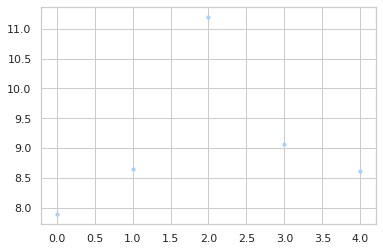

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

MSE = []

for train_idx, test_idx in ss.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    knn = KNeighborsClassifier(n_neighbors=35) #optimum found empirically
    knn.fit(X_train, y_train)
    
    knn_predictons = knn.predict(X_test).round()
    MSE = np.append(MSE, mean_squared_error(y_test, knn_predictons))
    
plt.scatter(range(5), MSE, color=bincmap[1], s=10)
print("MSE is within %.2f and %.2f with an average %.2f" % (MSE.min(), MSE.max(), MSE.mean()))

## Регрессия [10%]

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_lin = reg.predict(X_test).round()

print("MSE = %.2f" % mean_squared_error(y_test, y_lin),\
     "\nTrain R2 = %.2f" % r2_score(y_test, y_lin))

MSE = 8.54 
Train R2 = 0.27


## Деревья [20%]

MSE is within 13.85 and 21.63 with an average 18.43


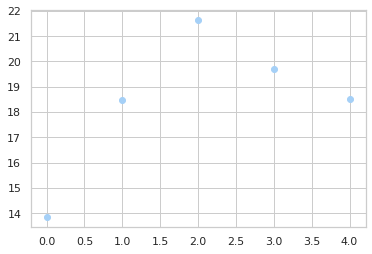

In [45]:
from sklearn.tree import DecisionTreeRegressor
MSE = []

for train_idx, test_idx in ss.split(X, y):
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    tree_reg = DecisionTreeRegressor(random_state=42)
    tree_reg.fit(X_train, y_train)
    
    y_tree = tree_reg.predict(X_test)
    MSE = np.append(MSE, mean_squared_error(y_test, y_tree))
    
plt.scatter(range(5), MSE, color=bincmap[1])
print("MSE is within %.2f and %.2f with an average %.2f" % (MSE.min(), MSE.max(), MSE.mean()))

## Оцените важность фичей c помощью алгоритма мл [+10% к ДЗ]

Можно использовать деревья из sklearn. Вам поможет метод: $ tree.feature_importances_ $

In [22]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, n_jobs=-1)
forest = forest.fit(train.drop(columns='G3'),train['G3'])
feature_imp = pd.DataFrame(forest.feature_importances_, index=train.drop(columns='G3').columns, columns=['Importance']\
    ).sort_values('Importance', ascending=False)

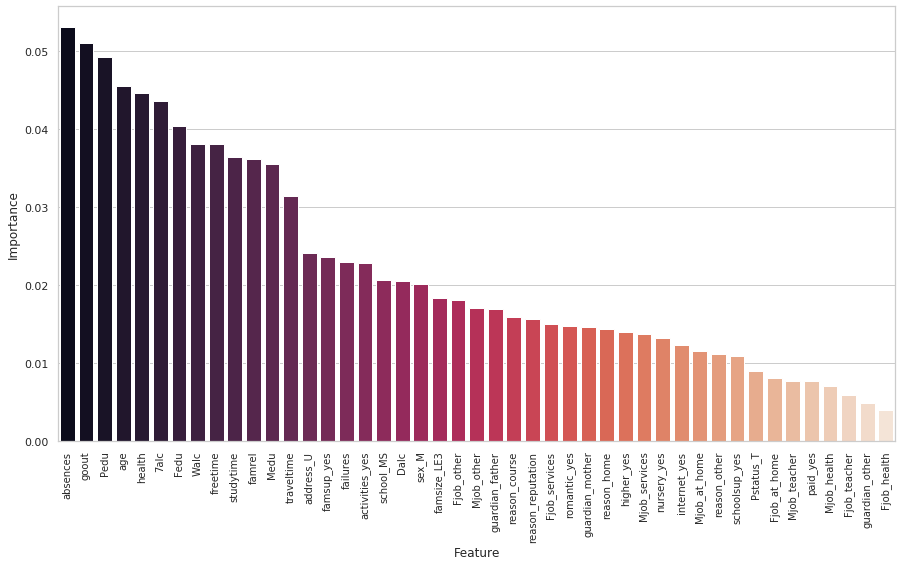

In [23]:
plt.subplots(figsize=(15,8))
sns.barplot(y=feature_imp['Importance'], x=feature_imp.index, palette='rocket')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием.

За лучшее предсказание 5 человек получат +10% к домашке. 
Ваши предсказания должны быть !!!!!!ЦЕЛЫМИ!!!!!
Но мерить будем по MSE.

In [47]:
submission = pd.read_csv('./data/submission.csv', index_col='id')
test = pd.read_csv('./data/X_test.csv')

test['7alc'] = (test['Dalc']*5 + test['Walc']*2)/7 
test['Pedu'] = test['Medu'] * test['Fedu']

test.drop(['Walc'], axis=1)
test.drop(['Dalc'], axis=1)
test.drop(['Medu'], axis=1)
test.drop(['Fedu'], axis=1)

test = bin_enc(test)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

submission['G3'] = [int(g) for g in tree_reg.predict(test).round()]
submission.to_csv('hw_1_BoriskovaEYU.csv', index=False) 